# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

# Importing the dataset

In [2]:
path = "../data/raw/Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(path)


# Initial data analysis

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23487 entries, 0 to 23486
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23487 non-null  int64 
 1   Clothing ID              23487 non-null  int64 
 2   Age                      23487 non-null  int64 
 3   Title                    19677 non-null  object
 4   Review Text              22642 non-null  object
 5   Rating                   23487 non-null  int64 
 6   Recommended IND          23487 non-null  int64 
 7   Positive Feedback Count  23487 non-null  int64 
 8   Division Name            23473 non-null  object
 9   Department Name          23473 non-null  object
 10  Class Name               23473 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23487.000000,23487.000000,23487.000000,23487.000000,23487.000000,23487.000000
mean,11742.999957,918.126623,43.198919,4.196066,0.822370,2.536765
std,6780.257149,203.298270,12.279416,1.110019,0.382209,5.703494
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.500000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11743.000000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17614.500000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


# Check for missing values

<Axes: >

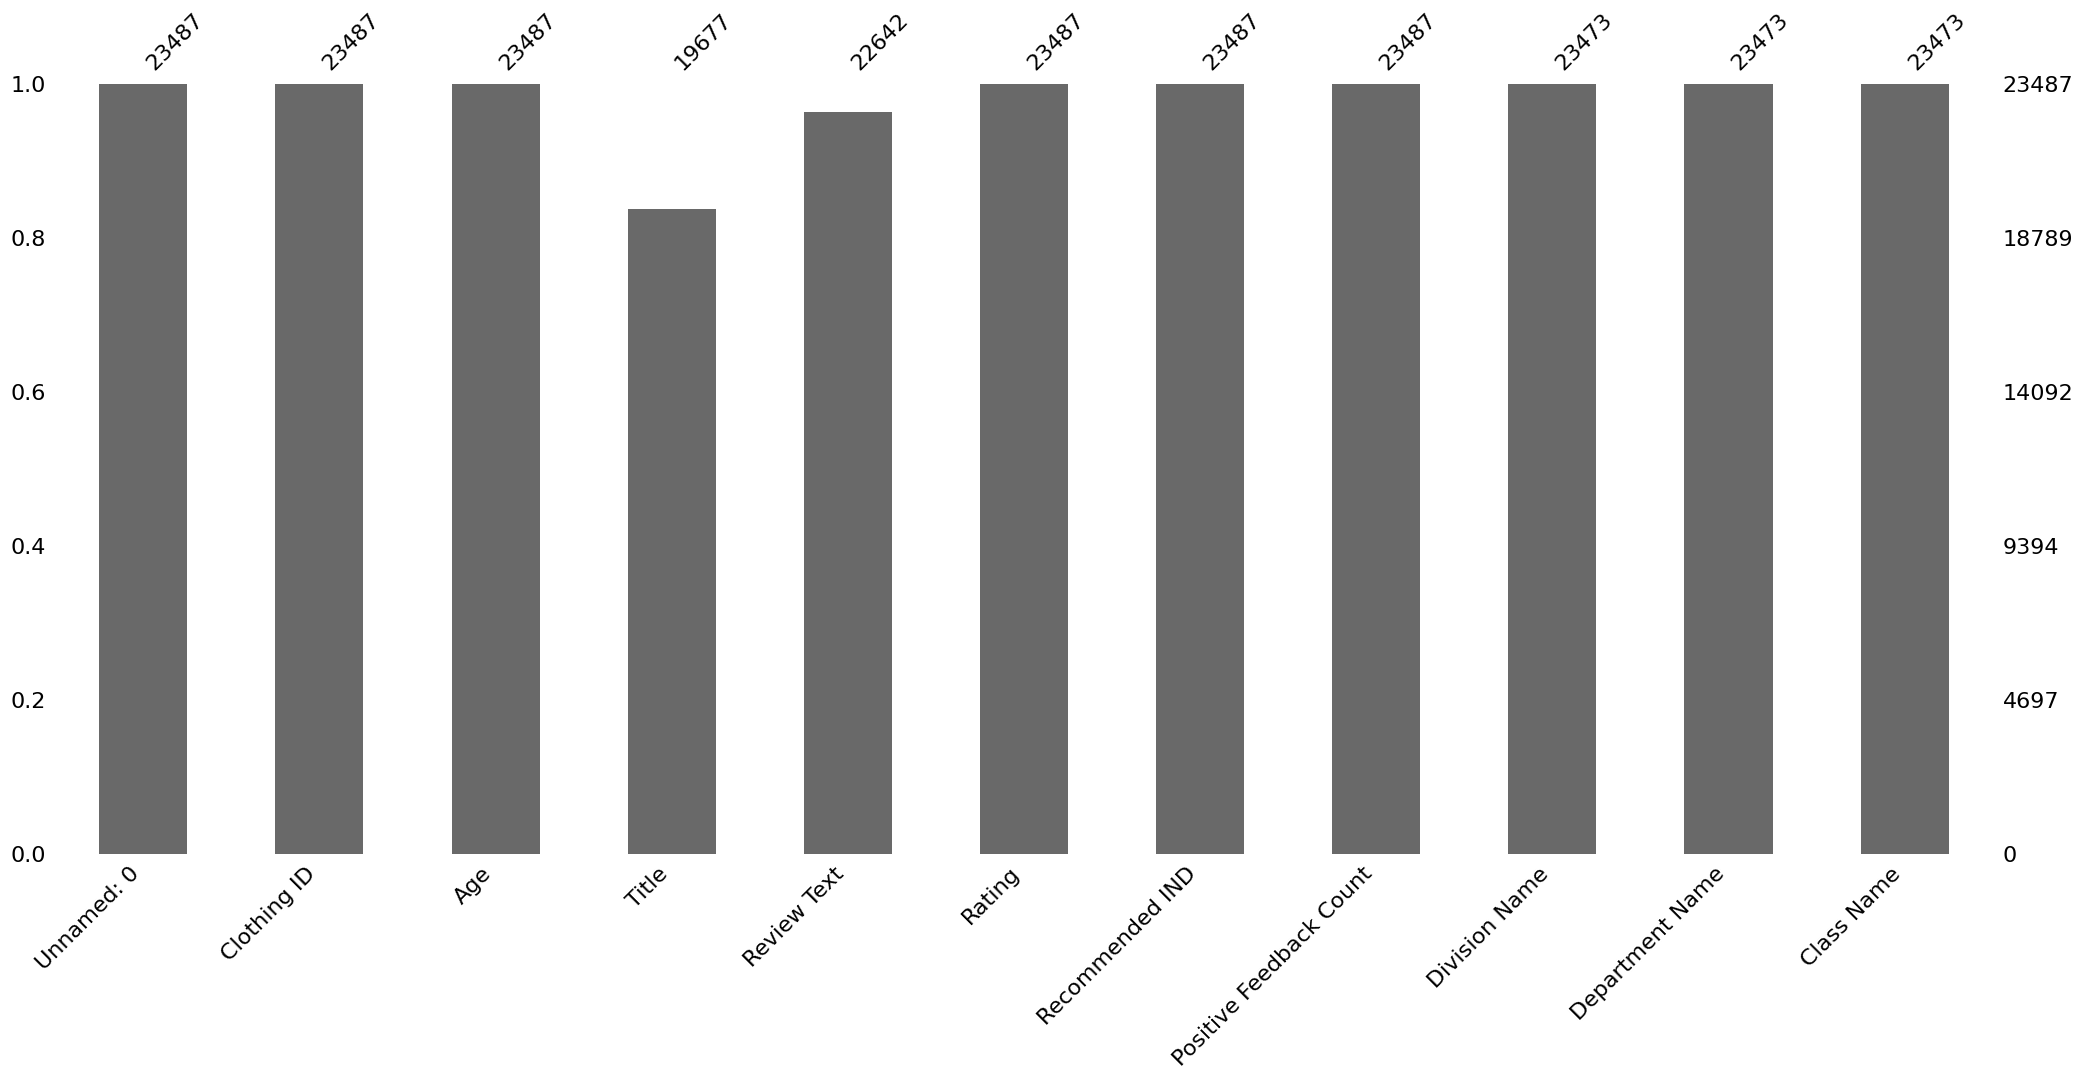

In [6]:
%matplotlib inline 
# msno.matrix(df)
msno.bar(df)
# msno.heatmap(df)
# msno.dendrogram(df)

# Data Cleaning

<Axes: >

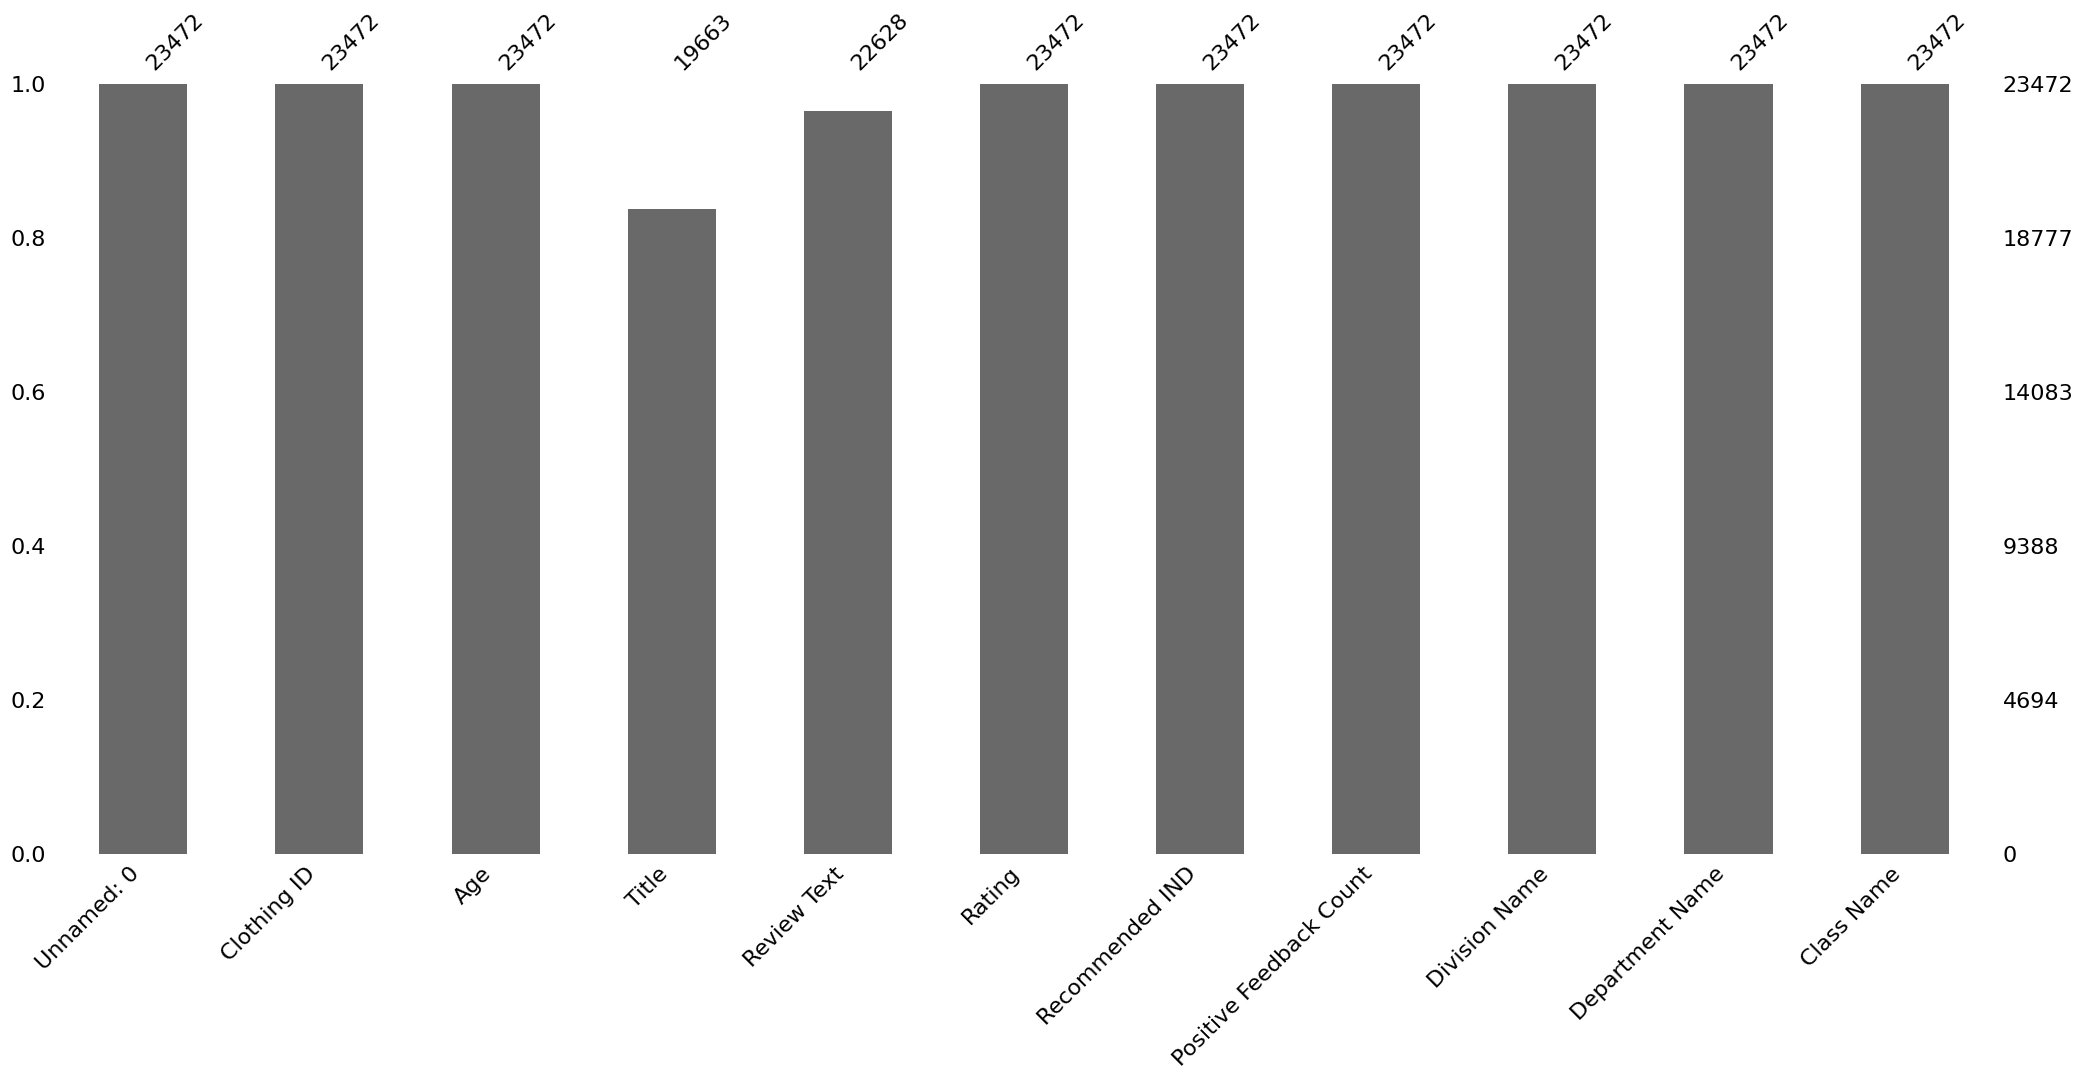

In [7]:
df.dropna(subset=['Division Name'], inplace=True)
df.drop_duplicates(inplace=True)
msno.bar(df)

In [8]:
df['Title'] = df['Title'].str.lower()
df['Review Text'] = df['Review Text'].str.lower()
df['Title'] = df['Title'].str.replace('[^\w\s]', '', regex=True)
df['Review Text'] = df['Review Text'].str.replace('[^\w\s]', '', regex=True)
df['Title'] = df['Title'].str.replace(r'\s+', ' ', regex=True)
df['Review Text'] = df['Review Text'].str.replace(r'\s+', ' ', regex=True)
df.fillna('', inplace=True)
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16720\1586919410.py:3: SyntaxWarning: invalid escape sequence '\w'
  df['Title'] = df['Title'].str.replace('[^\w\s]', '', regex=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16720\1586919410.py:4: SyntaxWarning: invalid escape sequence '\w'
  df['Review Text'] = df['Review Text'].str.replace('[^\w\s]', '', regex=True)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,,absolutely wonderful silky and sexy and comfor...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,,love this dress its sooo pretty i happened to ...,5,1,4,General,Dresses,Dresses
2,2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,my favorite buy,i love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder

le = dict()

for i in ['Division Name', 'Department Name', 'Class Name']:
    le[i] = LabelEncoder()
    df[i] = le[i].fit_transform(df[i])

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,,absolutely wonderful silky and sexy and comfor...,4,1,0,2,2,5
1,1,1080,34,,love this dress its sooo pretty i happened to ...,5,1,4,0,1,3
2,2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,3,0,0,0,1,3
3,3,1049,50,my favorite buy,i love love love this jumpsuit its fun flirty ...,5,1,0,1,0,13
4,4,847,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,6,0,4,0


# Handle outliers

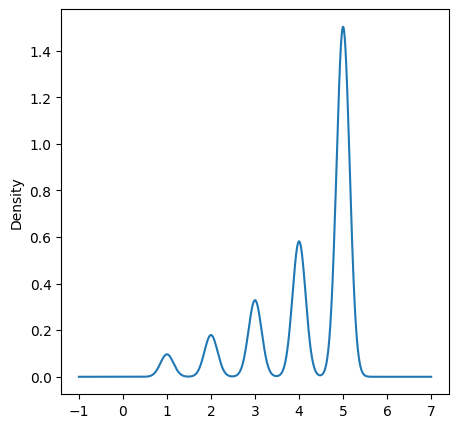

In [10]:
def remove_outliers(df, column: str):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[df[column].between(lower_bound, upper_bound)]
    return df

plt.figure(figsize=(5,5))
df['Rating'].plot(kind='density')

for i in ['Rating']:
    df = remove_outliers(df, i)


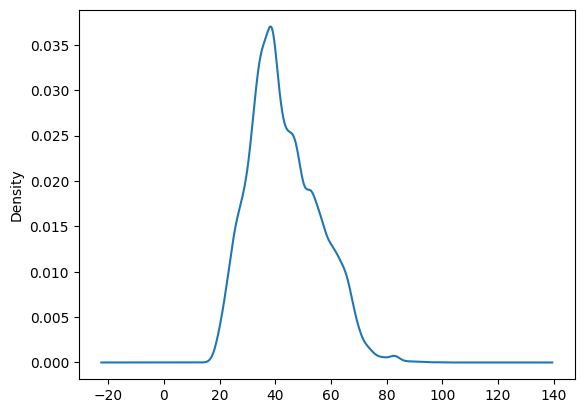

In [11]:
df['Age'].plot(kind='density')

plt.show()

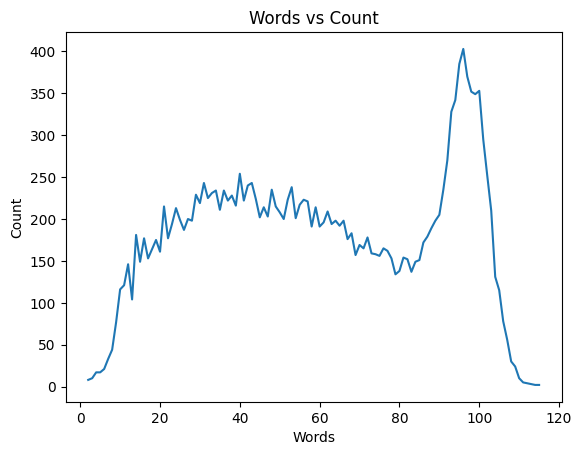

In [36]:
df['Word Count'] = df['Review Text'].str.split().str.len()
df_test = df[df['Word Count'] != 0]
word_count = df_test.groupby('Word Count')
word_count['Word Count'].value_counts().plot()
plt.title('Words vs Count')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [43]:
import spacy

# Output processed data to csv

In [12]:
new_path = '../data/processed/processed_dataset.csv'
df.to_csv(new_path, index=False)